# Introduction

I'm going to review different stocks and do the timseries analysis on them. The goal is to find the stocks that are non-stationary and check what is the result of the hurst exponent and get the stock with higher value in the hurst exponent because it will be useful for our momentum trading strategy.

I'm going to work with daily data from yahoo finance.

**Steps to follow:**

1 - Import the libraries

2 - Get the data from yahoo finance

3 - Analyze timeseries using adfuller test and hurst exponent

4 - Get the stocks with a hurst exponent greater than a defined threshold and plot them

5 - Calculate the volatility of the selected stocks and in my case, I'm going to select the stock with lowest and highest volatility to do the momentum trading strategy

6 - According to the hurst exponent and the visual analysis, select the stocks that are non-stationary and get the best one for our momentum trading strategy.

## Syllabus

* [1 - Import the libraries](#1)
* [2 - Get data](#2)
* [3 - Selection timeseries for momentum trading strategy](#3)
* [4 - Analyze selected stocks](#4)
  * [4.1 - Analyze stock with highest volatility](#4.1)
  * [4.2 - Analyze stock with lowest volatility](#4.2)

## 1 - Import the libraries <a id="1"></a>

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import datetime
import os
from hurst import compute_Hc
from typing import List
import utils

## 2 - Get data <a id="2"></a>

We have a file that contains the list of stocks that we want to analyze. We are going to read the file and get the list of stocks. Then, we are going to get the data from yahoo finance if we don't have it in our local machine. If we have a file called stocks.csv, we are going to read it and get the data from there.

In [2]:
stocks = utils.load_stocks()

In [3]:
stocks.shape

(5827, 593)

## 3 - Selection timeseries for momentum trading strategy <a id="3"></a>

In this section we are going to select the stocks that are non-stationary and get the best one for our momentum trading strategy. We are going to use the hurst exponent to get the stocks that the hurst exponent is greater than a defined threshold. We are going to use the adfuller test to check if the timeseries is stationary or not.

**Hurst exponent threshold:** 0.6

**P value threshold:** 0.05

In [4]:
selected_stocks = utils.get_non_stationary_stocks(stocks)

55 non-stationary stock timeseries removed


In [5]:
selected_stocks = utils.get_trending_stocks(selected_stocks, threshold=0.6)

513 non-trending stock timeseries removed


In [6]:
selected_stocks.to_csv('./assets/selected_stocks.csv')

In [7]:
selected_stocks.shape

(5827, 25)

### 4 - Analyze selected stocks <a id="4"></a>

We are going to analyze the stock with highest and lowest volatility in order to see if is better to use the stock with highest volatility or the stock with lowest volatility.

In [8]:
stock_returns = np.log(selected_stocks / selected_stocks.shift(1)).dropna()
stocks_volatility = pd.DataFrame(stock_returns.std(), columns=['volatility'])
stocks_volatility['annual_volatility'] = stocks_volatility['volatility'] * np.sqrt(252)

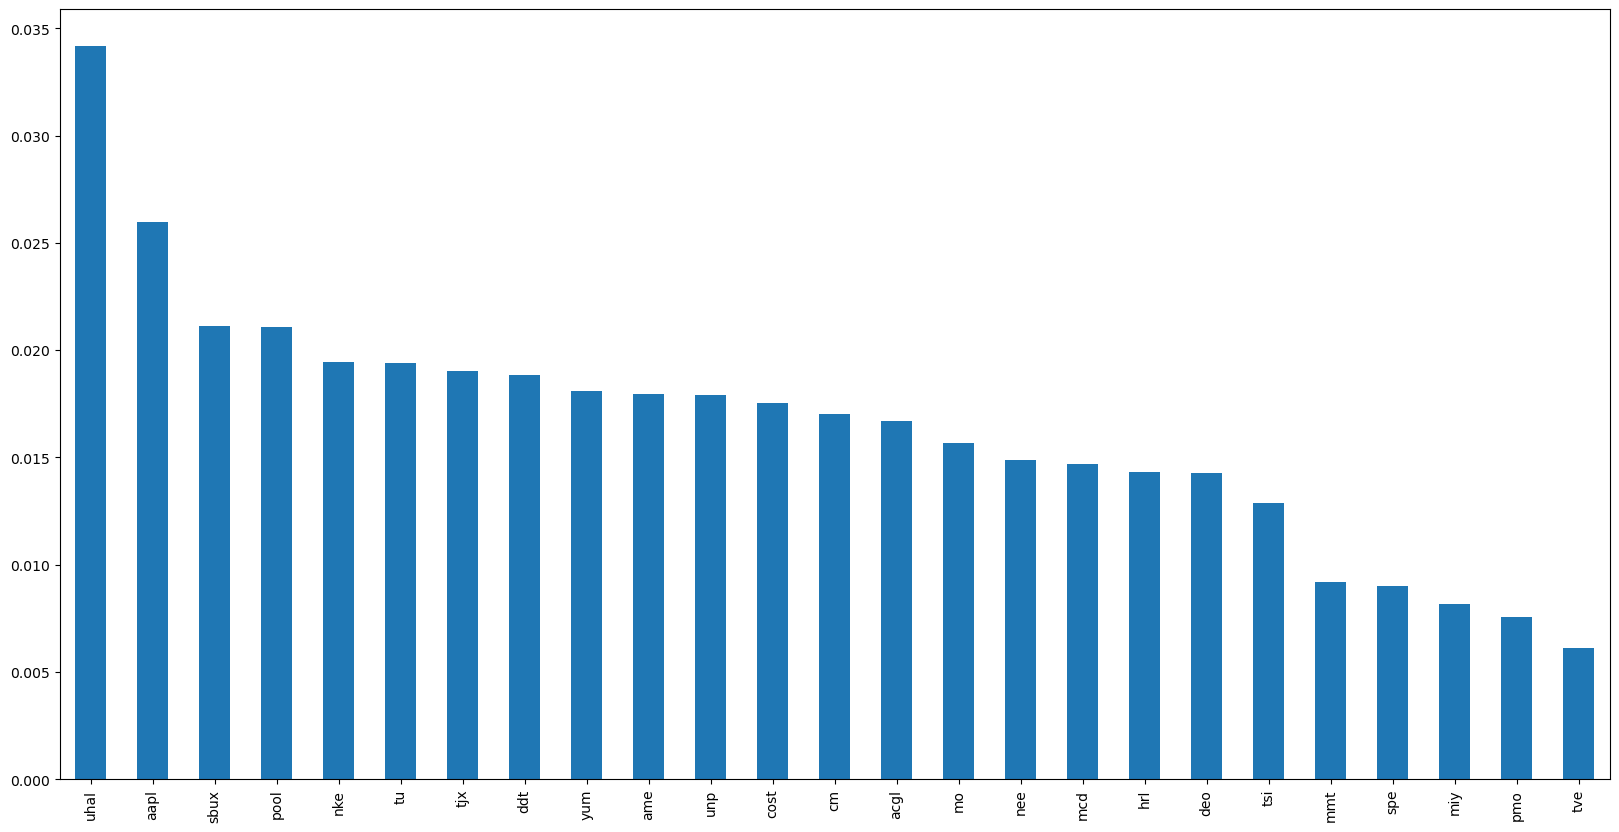

In [9]:
stocks_volatility['volatility'].sort_values(ascending=False).plot(kind='bar', figsize=(20, 10))

In [10]:
window = 14

#### 4.1 - Analyze stock with highest volatility <a id="4.1"></a>

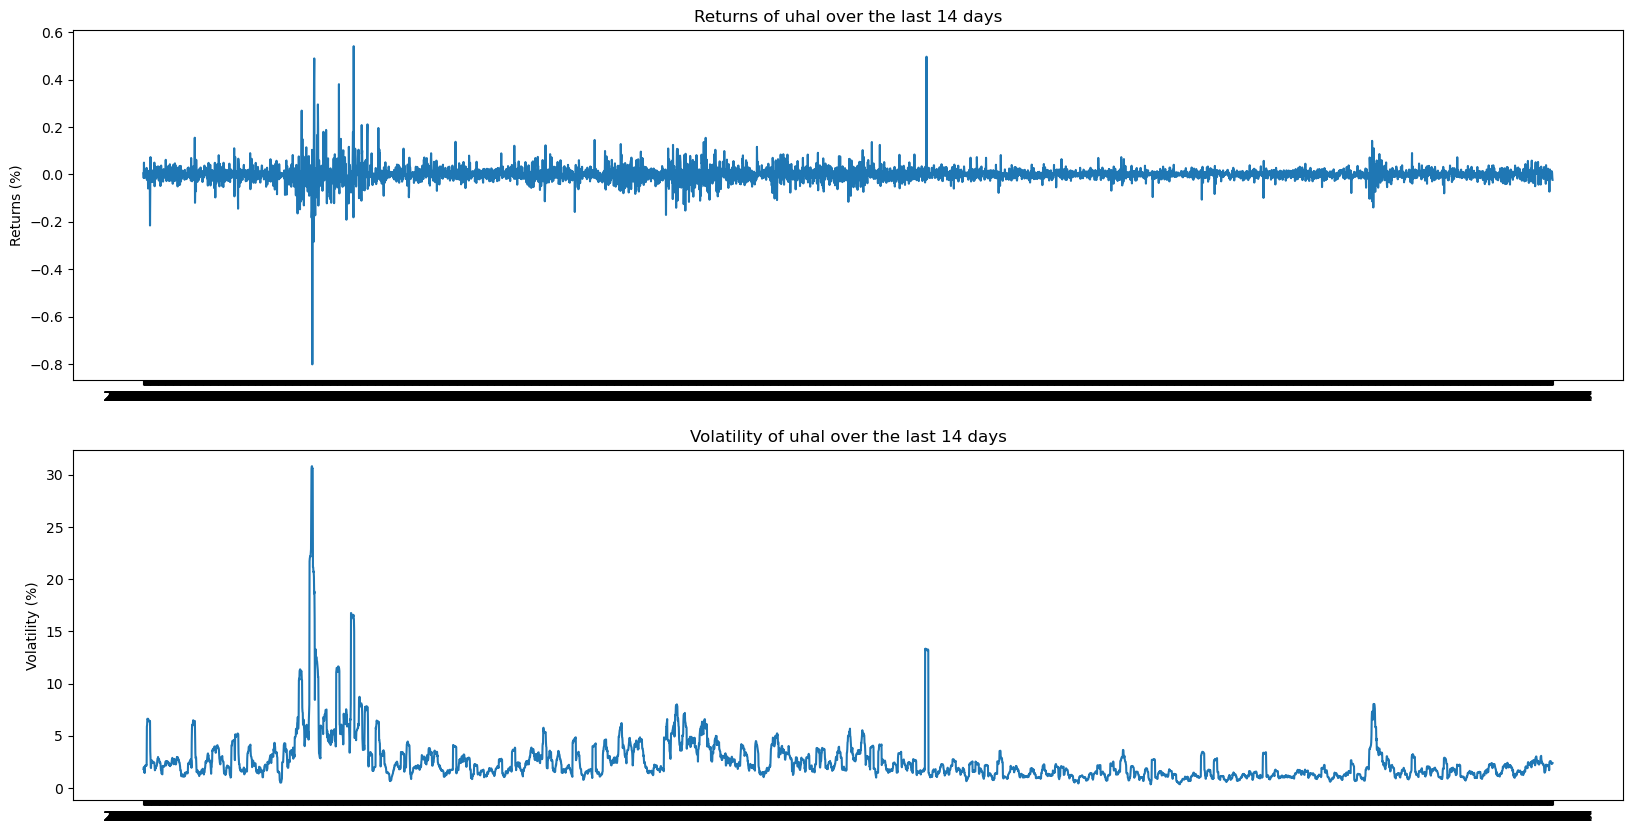

In [11]:
most_volatile_stock = stocks_volatility['volatility'].sort_values(ascending=False).index[0]
volatility = (stock_returns[most_volatile_stock].rolling(window).std() * 100).dropna()

# Plot volatility and returns two charts one above the other
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

# Plot returns
ax1.plot(stock_returns[most_volatile_stock])
ax1.set_title(f'Returns of {most_volatile_stock} over the last {window} days')
ax1.set_ylabel('Returns (%)')

# Plot volatility
ax2.plot(volatility)
ax2.set_title(f'Volatility of {most_volatile_stock} over the last {window} days')
ax2.set_ylabel('Volatility (%)')

plt.show()

#### 4.2 - Analyze stock with lowest volatility <a id="4.2"></a>

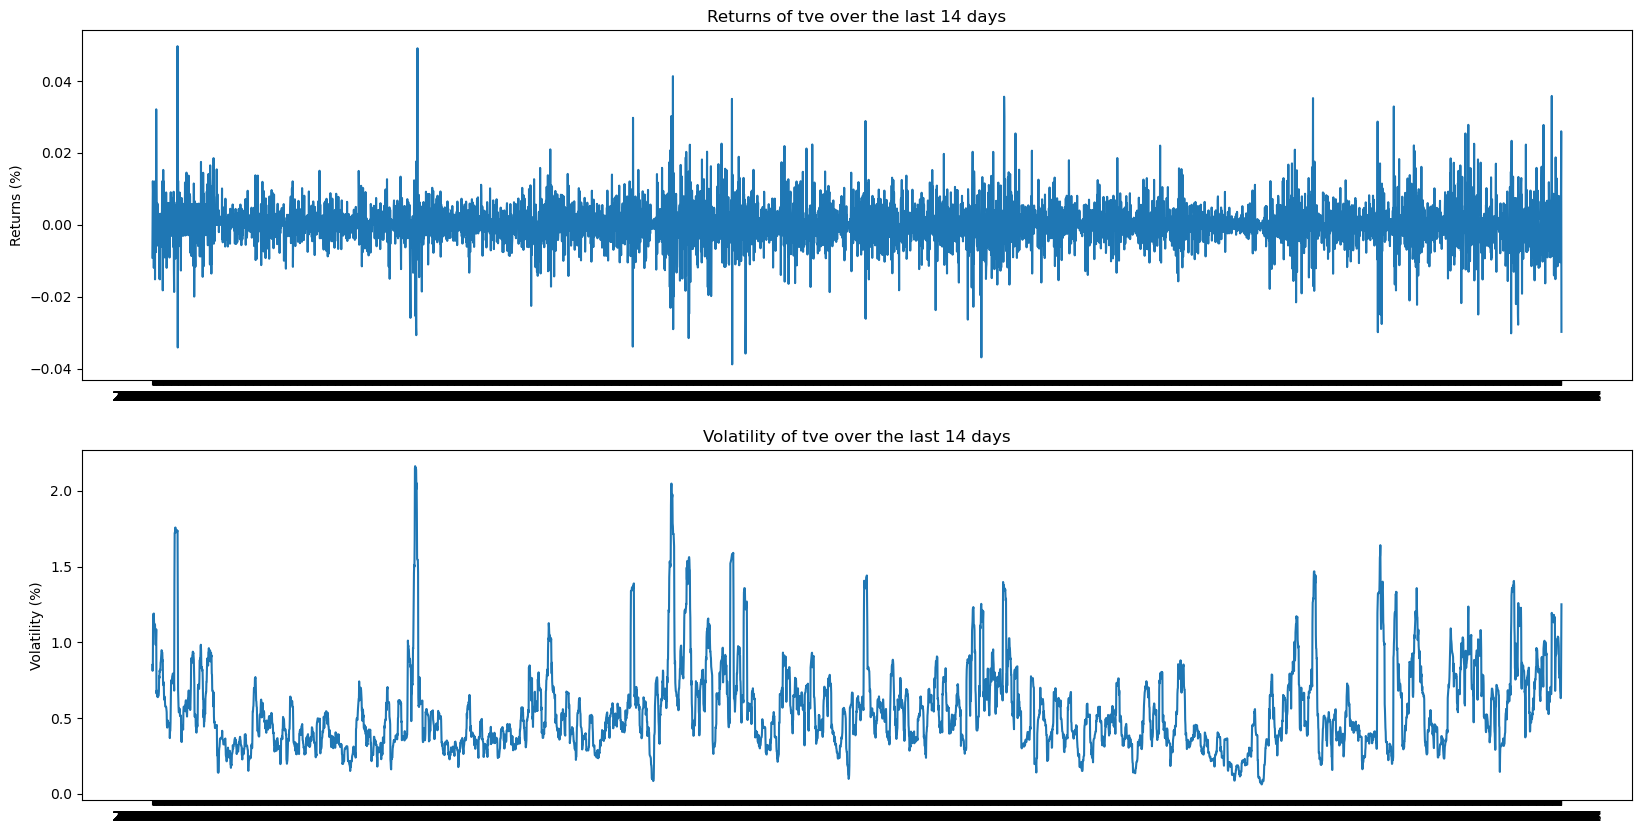

In [12]:
least_volatile_stock = stocks_volatility['volatility'].sort_values(ascending=False).index[-1]
volatility = (stock_returns[least_volatile_stock].rolling(window).std() * 100).dropna()

# Plot volatility and returns two charts one above the other
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

# Plot returns
ax1.plot(stock_returns[least_volatile_stock])
ax1.set_title(f'Returns of {least_volatile_stock} over the last {window} days')
ax1.set_ylabel('Returns (%)')

# Plot volatility
ax2.plot(volatility)
ax2.set_title(f'Volatility of {least_volatile_stock} over the last {window} days')
ax2.set_ylabel('Volatility (%)')

plt.show()